In [2]:
# Importing the required libraries

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [3]:
# change defaults to be less ugly
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

In [5]:
#Parameters for random network
nodes = 300
edges = 8066
p = 2 * edges / (nodes * (nodes - 1))
G = nx.erdos_renyi_graph(nodes, p) 

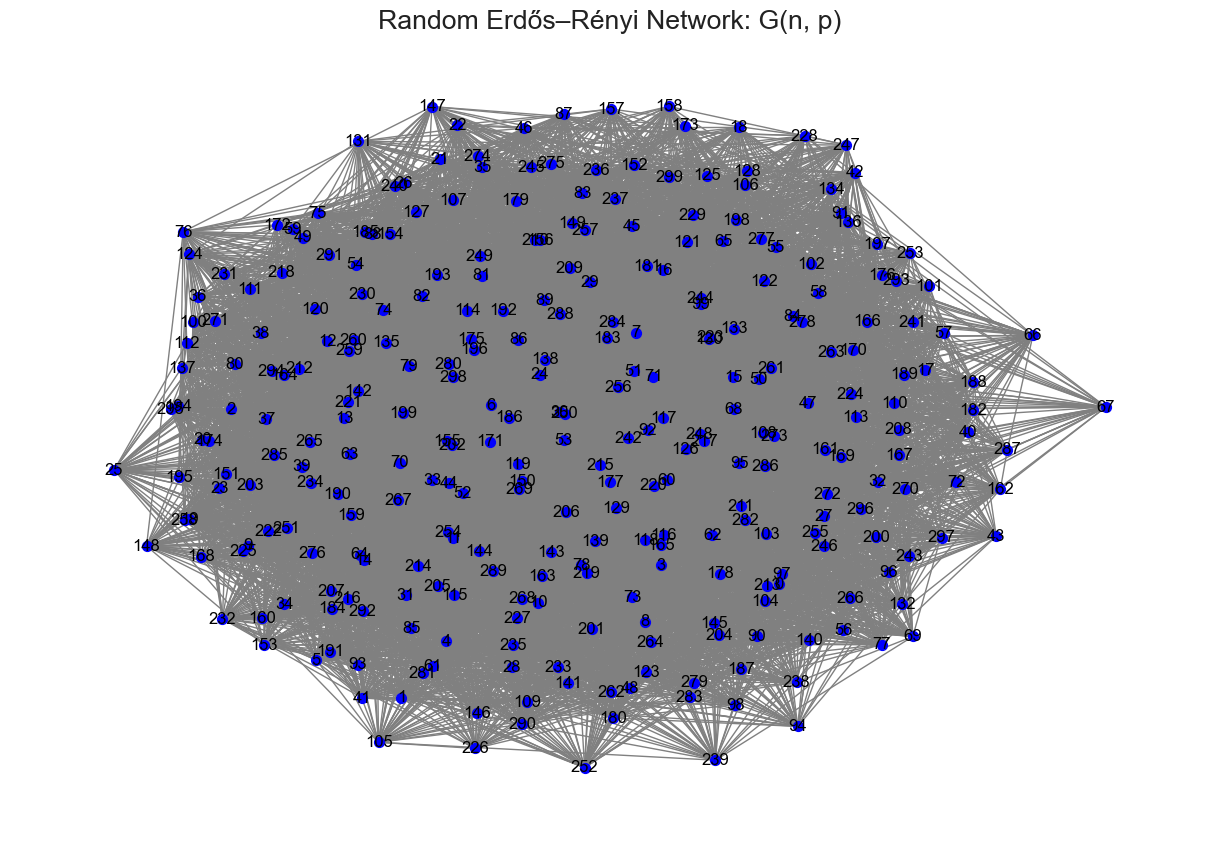

In [6]:
#Visualization
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_size=50, node_color='blue', edge_color='gray')
plt.title('Random Erdős–Rényi Network: G(n, p)')
plt.show()

In [8]:
# Initialize lists to store metrics of interest
average_path_lengths = []
clustering_coefficients = []

# Generate 1000 Erdős–Rényi random graphs and calculate metrics
for _ in range(10):
    G = nx.erdos_renyi_graph(nodes, p)
    
    # Ensure the graph is connected to calculate the average path length
    if nx.is_connected(G):
        average_path_length = nx.average_shortest_path_length(G)
        average_path_lengths.append(average_path_length)
    
    clustering_coefficient = nx.average_clustering(G)
    clustering_coefficients.append(clustering_coefficient)

# Now you have the metrics for 1000 random graphs
# You can compare these metrics with those of your original graph
# For example, calculate the mean and standard deviation
mean_path_length = np.mean(average_path_lengths)
std_path_length = np.std(average_path_lengths)

mean_clustering_coefficient = np.mean(clustering_coefficients)
std_clustering_coefficient = np.std(clustering_coefficients)

print(f"Average Path Length: Mean = {mean_path_length}, Std = {std_path_length}")
print(f"Clustering Coefficient: Mean = {mean_clustering_coefficient}, Std = {std_clustering_coefficient}")

# Add here the calculation and comparison for your original graph's metrics

Average Path Length: Mean = 1.8202408026755852, Std = 0.0014425639990058902
Clustering Coefficient: Mean = 0.17978395419298038, Std = 0.0016200833136792972
